In [ ]:
# within this chapter, we'll learn
• Split a pandas object into pieces using one or more keys (in the form of func‐ tions, arrays, or DataFrame column names)
• Calculate group summary statistics, like count, mean, or standard deviation, or a user-defined function
• Apply within-group transformations or other manipulations, like normalization, linear regression, rank, or subset selection
• Compute pivot tables and cross-tabulations
• Perform quantile analysis and other statistical group analyses

In [4]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
'key2' : ['one', 'two', 'one', 'two', 'one'],
'data1' : np.random.randn(5),
'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,1.050458,0.355661,a,one
1,0.063240,-0.199792,a,two
2,0.064679,-0.841389,b,one
3,-1.414409,0.928544,b,two
4,0.121591,-0.356424,a,one


In [9]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [10]:
grouped.mean()

key1
a    0.411763
b   -0.674865
Name: data1, dtype: float64

In [11]:
grouped.sum()

key1
a    1.235289
b   -1.349730
Name: data1, dtype: float64

means = df['data1'].groupby([df['key1'],df['key2']]).mean()

In [15]:
means

key1  key2
a     one     0.586024
      two     0.063240
b     one     0.064679
      two    -1.414409
Name: data1, dtype: float64

In [17]:
means.unstack()

key2,one,two
key1,,
a,0.586024,0.063240
b,0.064679,-1.414409


In [18]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [19]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [20]:
df['data1'].groupby([states, years]).mean()

California  2005    0.063240
            2006    0.064679
Ohio        2005   -0.181975
            2006    0.121591
Name: data1, dtype: float64

In [22]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.411763,-0.066852
b,-0.674865,0.043577


In [24]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.586024 -0.000381
     two   0.063240 -0.199792
b    one   0.064679 -0.841389
     two  -1.414409  0.928544

In [25]:
# count the numbers of each of subgroup
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [26]:
# Iterating Over Groups
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0  1.050458  0.355661    a  one
1  0.063240 -0.199792    a  two
4  0.121591 -0.356424    a  one
b
      data1     data2 key1 key2
2  0.064679 -0.841389    b  one
3 -1.414409  0.928544    b  two


In [28]:
for (key1, key2), group in df.groupby(['key1', 'key2']):
    print((key1, key2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0  1.050458  0.355661    a  one
4  0.121591 -0.356424    a  one
('a', 'two')
     data1     data2 key1 key2
1  0.06324 -0.199792    a  two
('b', 'one')
      data1     data2 key1 key2
2  0.064679 -0.841389    b  one
('b', 'two')
      data1     data2 key1 key2
3 -1.414409  0.928544    b  two


In [29]:
for name, group in df.groupby('key2'):
    print(name)
    print(group)

one
      data1     data2 key1 key2
0  1.050458  0.355661    a  one
2  0.064679 -0.841389    b  one
4  0.121591 -0.356424    a  one
two
      data1     data2 key1 key2
1  0.063240 -0.199792    a  two
3 -1.414409  0.928544    b  two


In [30]:
pieces = dict(list(df.groupby('key1')))

In [31]:
pieces['b']

,data1,data2,key1,key2
2,0.064679,-0.841389,b,one
3,-1.414409,0.928544,b,two


In [34]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.411763,-0.066852
b,-0.674865,0.043577


In [36]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [37]:
grouped = df.groupby(df.dtypes, axis=1)

In [38]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  1.050458  0.355661
1  0.063240 -0.199792
2  0.064679 -0.841389
3 -1.414409  0.928544
4  0.121591 -0.356424
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [43]:
# Selecting a Column or Subset of Columns
df.groupby('key1')['data1'].mean()

key1
a    0.411763
b   -0.674865
Name: data1, dtype: float64

In [45]:
df.groupby('key1')[['data2']].mean()

,data2
key1,
a,-0.066852
b,0.043577


In [47]:
df['data1'].groupby(df['key1']).mean()

key1
a    0.411763
b   -0.674865
Name: data1, dtype: float64

In [49]:
# transform to dataframe
df[['data2']].groupby(df['key1']).mean()

,data2
key1,
a,-0.066852
b,0.043577


In [53]:
df.groupby('key1')[['data1']].mean()

,data1
key1,
a,0.411763
b,-0.674865


In [54]:
df['data2']

0    0.355661
1   -0.199792
2   -0.841389
3    0.928544
4   -0.356424
Name: data2, dtype: float64

In [55]:
# transform to dataframe
df[['data2']]

,data2
0,0.355661
1,-0.199792
2,-0.841389
3,0.928544
4,-0.356424


In [56]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.000381
     two  -0.199792
b    one  -0.841389
     two   0.928544

In [57]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

In [58]:
s_grouped.mean()

key1  key2
a     one    -0.000381
      two    -0.199792
b     one    -0.841389
      two     0.928544
Name: data2, dtype: float64

In [59]:
# Grouping with Dicts and Series
people = pd.DataFrame(np.random.randn(5,5),
                     columns = ['a', 'b', 'c', 'd', 'e'],
                     index=['Joe', 'Steve', 'Wes', 'Jim','Travis'])

In [60]:
people.iloc[2:3, [1,2]] = np.nan # add a few NA values

In [61]:
people

,a,b,c,d,e
Joe,-1.074695,1.268833,-0.999390,-0.962994,0.936762
Steve,0.004834,0.689473,0.373021,0.668143,-1.734572
Wes,0.786450,NaN,NaN,-0.522150,-1.808243
Jim,-0.169616,-0.784883,2.888788,-1.801514,1.968231
Travis,-1.133961,2.165398,0.049225,-1.623364,-0.335045


In [64]:
mapping = {'a':'red', 'b': 'red', 'c':'blue', 
          'd':'blue', 'e':'red', 'f':'orange'}

In [65]:
by_column = people.groupby(mapping, axis=1)

In [67]:
by_column.sum()

,blue,red
Joe,-1.962384,1.130900
Steve,1.041164,-1.040264
Wes,-0.522150,-1.021794
Jim,1.087274,1.013732
Travis,-1.574139,0.696392


In [69]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [70]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [79]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [80]:
# Grouping with Functions
people.groupby(len).sum()

,a,b,c,d,e
3,-0.457861,0.483950,1.889398,-3.286658,1.096750
5,0.004834,0.689473,0.373021,0.668143,-1.734572
6,-1.133961,2.165398,0.049225,-1.623364,-0.335045


/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


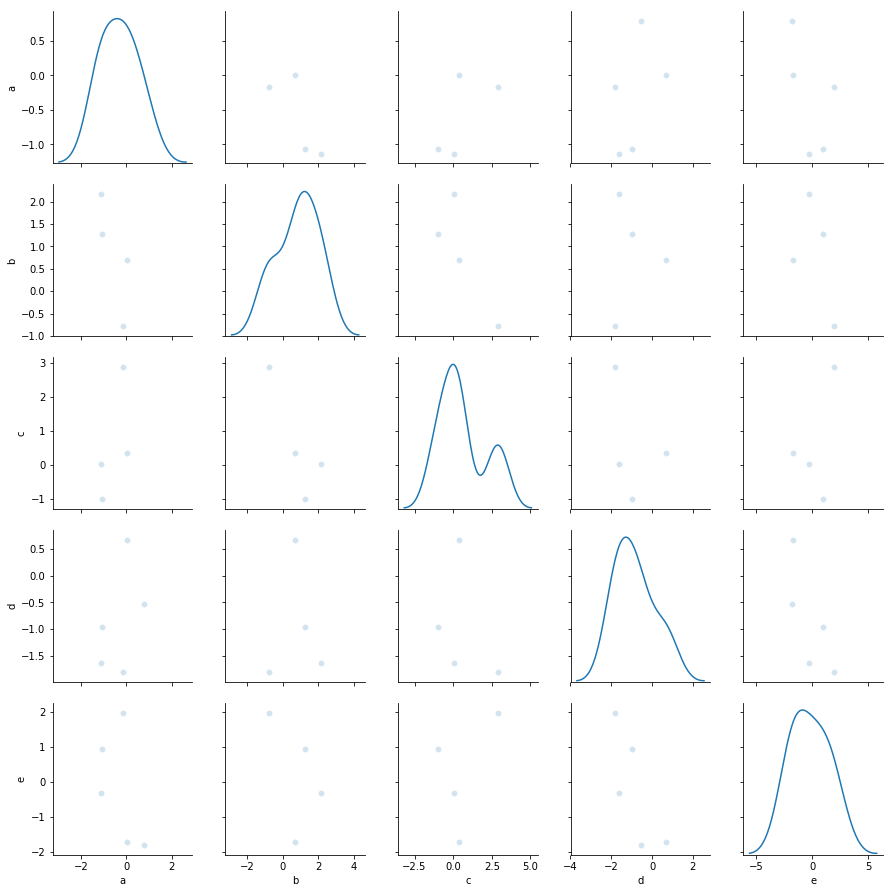

In [89]:
import seaborn as sns
sns.pairplot(people,diag_kind='kde', plot_kws={'alpha':0.2})

In [94]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [95]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.074695  1.268833 -0.999390 -0.962994 -1.808243
  two -0.169616 -0.784883  2.888788 -1.801514  1.968231
5 one  0.004834  0.689473  0.373021  0.668143 -1.734572
6 two -1.133961  2.165398  0.049225 -1.623364 -0.335045

In [96]:
# Grouping by Index Levels
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                [1, 3, 5, 1, 3]],
                                names=['cty', 'tenor'])

In [97]:
hier_df = pd.DataFrame(np.random.randn(4,5), columns=columns)

In [98]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.949194 -0.910588 -0.014527 -0.130269 -1.305652
1     -0.351671  0.300605  0.490635  0.337720  0.716486
2     -0.262005 -1.235448 -0.583969 -1.500891 -0.346479
3      0.280153  1.552696 -0.754290  0.575412  0.839136

In [99]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [102]:
hier_df.groupby(level=['tenor','cty'], axis=1).count()

tenor  1     3     5
cty   JP US JP US US
0      1  1  1  1  1
1      1  1  1  1  1
2      1  1  1  1  1
3      1  1  1  1  1

In [104]:
# Data Aggregation
df

,data1,data2,key1,key2
0,1.050458,0.355661,a,one
1,0.063240,-0.199792,a,two
2,0.064679,-0.841389,b,one
3,-1.414409,0.928544,b,two
4,0.121591,-0.356424,a,one


In [105]:
grouped = df.groupby('key1')

In [109]:
grouped['data1'].quantile(0.9)

key1
a    0.864685
b   -0.083230
Name: data1, dtype: float64

In [111]:
grouped.mean()

,data1,data2
key1,,
a,0.411763,-0.066852
b,-0.674865,0.043577


In [112]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [113]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.987218,0.712085
b,1.479088,1.769933


In [115]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.411763  0.553895  0.063240  0.092415  0.121591  0.586024   
b      2.0 -0.674865  1.045873 -1.414409 -1.044637 -0.674865 -0.305093   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.050458   3.0 -0.066852  0.374194 -0.356424 -0.278108 -0.199792   
b     0.064679   2.0  0.043577  1.251531 -0.841389 -0.398906  0.043577   

                          
           75%       max  
key1                      
a     0.077934  0.355661  
b     0.486060  0.928544

In [119]:
grouped.head(10)

,data1,data2,key1,key2
0,1.050458,0.355661,a,one
1,0.063240,-0.199792,a,two
2,0.064679,-0.841389,b,one
3,-1.414409,0.928544,b,two
4,0.121591,-0.356424,a,one


In [120]:
tips = pd.read_csv('Desktop/tips.csv')

In [121]:
# add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [123]:
tips['tip_pct2'] = tips[['tip']].apply(lambda x: x/sum(x))

In [128]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct,tip_pct2
0,16.99,1.01,No,Sun,Dinner,2,0.059447,0.001381
1,10.34,1.66,No,Sun,Dinner,3,0.160542,0.002269
2,21.01,3.50,No,Sun,Dinner,3,0.166587,0.004784
3,23.68,3.31,No,Sun,Dinner,2,0.139780,0.004524
4,24.59,3.61,No,Sun,Dinner,4,0.146808,0.004935
5,25.29,4.71,No,Sun,Dinner,4,0.186240,0.006438


In [129]:
grouped = tips.groupby(['day', 'smoker'])

In [136]:
grouped_pct = grouped['tip_pct']

In [137]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [135]:
grouped_pct = grouped[['tip_pct']]
grouped_pct.agg('mean')

tip_pct
day  smoker          
Fri  No      0.151650
     Yes     0.174783
Sat  No      0.158048
     Yes     0.147906
Sun  No      0.160113
     Yes     0.187250
Thur No      0.160298
     Yes     0.163863

In [138]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [139]:
grouped_pct.agg([('foo', 'mean'),('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [140]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [141]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [142]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]

In [143]:
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [144]:
grouped.agg({'tip': np.max, 'size':'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [158]:
data = pd.read_csv('Desktop/Book6.csv')

In [159]:
data = data.melt()

In [161]:
data['value1'] = np.arange(34)

In [162]:
data

,variable,value,value1
0,上海市,0.053580,0
1,东莞市,0.152215,1
2,佛山市,0.138518,2
3,北京市,0.083984,3
4,南京市,0.082626,4
5,南昌市,0.116465,5
6,厦门市,0.065816,6
7,合肥市,0.108044,7
8,哈尔滨市,0.117274,8
9,大连市,0.111703,9


In [164]:
data.agg({'value': 'mean', 'value1': 'sum'})

value       0.095684
value1    561.000000
dtype: float64

In [165]:
grouped.agg({'tip_pct':['min', 'max', 'mean', 'std'],
            'size': 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [166]:
# Returning Aggregated Data Without Row Indexes

In [167]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct,tip_pct2
0,Fri,No,18.420000,2.812500,2.250000,0.151650,0.003844
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783,0.003710
2,Sat,No,19.661778,3.102889,2.555556,0.158048,0.004241
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906,0.003931
4,Sun,No,20.506667,3.167895,2.929825,0.160113,0.004330
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250,0.004807
6,Thur,No,17.113111,2.673778,2.488889,0.160298,0.003655
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863,0.004142


In [169]:
tips.groupby(['day', 'smoker']).mean()

total_bill       tip      size   tip_pct  tip_pct2
day  smoker                                                    
Fri  No       18.420000  2.812500  2.250000  0.151650  0.003844
     Yes      16.813333  2.714000  2.066667  0.174783  0.003710
Sat  No       19.661778  3.102889  2.555556  0.158048  0.004241
     Yes      21.276667  2.875476  2.476190  0.147906  0.003931
Sun  No       20.506667  3.167895  2.929825  0.160113  0.004330
     Yes      24.120000  3.516842  2.578947  0.187250  0.004807
Thur No       17.113111  2.673778  2.488889  0.160298  0.003655
     Yes      19.190588  3.030000  2.352941  0.163863  0.004142

In [170]:
# Apply:General split-apply-combine

In [171]:
# define a function to generate the last 5 records
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct,tip_pct2
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525,0.005468
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535,0.008885
232,11.61,3.39,No,Sat,Dinner,2,0.291990,0.004634
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733,0.001367
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667,0.005468
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345,0.007040


In [172]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct  tip_pct2
smoker                                                                     
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746  0.007996
       185       20.69  5.00     No   Sun  Dinner     5  0.241663  0.006835
       51        10.29  2.60     No   Sun  Dinner     2  0.252672  0.003554
       149        7.51  2.00     No  Thur   Lunch     2  0.266312  0.002734
       232       11.61  3.39     No   Sat  Dinner     2  0.291990  0.004634
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525  0.005468
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535  0.008885
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733  0.001367
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667  0.005468
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345  0.007040

In [173]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct  \
smoker day                                                                
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857   
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220   
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799   
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389   
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750   
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812   
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178   
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982   

                 tip_pct2  
smoker day                 
No     Fri  94   0.004442  
       Sat  212  0.012302  
       Sun  156  0.006835  
       Thur 142  0.006835  
Yes    Fri  95   0.006465  
       Sat  170  0.013669  
       Sun  182  0.004784  
       Thur 197  0.006835

In [174]:
tips.groupby(['time','smoker']).apply(top, n=1, column='tip')

total_bill   tip smoker   day    time  size   tip_pct  \
time   smoker                                                              
Dinner No     212       48.33   9.0     No   Sat  Dinner     4  0.186220   
       Yes    170       50.81  10.0    Yes   Sat  Dinner     3  0.196812   
Lunch  No     141       34.30   6.7     No  Thur   Lunch     6  0.195335   
       Yes    197       43.11   5.0    Yes  Thur   Lunch     4  0.115982   

                   tip_pct2  
time   smoker                
Dinner No     212  0.012302  
       Yes    170  0.013669  
Lunch  No     141  0.009158  
       Yes    197  0.006835

In [175]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [176]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [178]:
result1 = tips.groupby('time')['tip'].describe()
result1

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


In [182]:
df = pd.read_csv('Desktop/Book6.csv')
df.melt().describe()

,value
count,34.000000
mean,0.095684
std,0.036974
min,0.050003
25%,0.071661
50%,0.086095
75%,0.115671
max,0.234943


In [183]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [184]:
f = lambda x: x.describe()
grouped.apply(f)

total_bill        tip       size    tip_pct   tip_pct2
day  smoker                                                              
Fri  No     count    4.000000   4.000000   4.000000   4.000000   4.000000
            mean    18.420000   2.812500   2.250000   0.151650   0.003844
            std      5.059282   0.898494   0.500000   0.028123   0.001228
            min     12.460000   1.500000   2.000000   0.120385   0.002050
            25%     15.100000   2.625000   2.000000   0.137239   0.003588
            50%     19.235000   3.125000   2.000000   0.149241   0.004272
            75%     22.555000   3.312500   2.250000   0.163652   0.004528
            max     22.750000   3.500000   3.000000   0.187735   0.004784
     Yes    count   15.000000  15.000000  15.000000  15.000000  15.000000
            mean    16.813333   2.714000   2.066667   0.174783   0.003710
            std      9.086388   1.077668   0.593617   0.051293   0.001473
            min      5.750000   1.000000   1.000000   0.103555   0.001367
            25%     11.690000   1.960000   2.000000   0.133739   0.002679
            50%     13.420000   2.500000   2.000000   0.173913   0.003417
            75%     18.665000   3.240000   2.000000   0.209240   0.004429
            max     40.170000   4.730000   4.000000   0.263480   0.006465
Sat  No     count   45.000000  45.000000  45.000000  45.000000  45.000000
            mean    19.661778   3.102889   2.555556   0.158048   0.004241
            std      8.939181   1.642088   0.784960   0.039767   0.002245
            min      7.250000   1.000000   1.000000   0.056797   0.001367
            25%     14.730000   2.010000   2.000000   0.136240   0.002747
            50%     17.820000   2.750000   2.000000   0.150152   0.003759
            75%     20.650000   3.390000   3.000000   0.183915   0.004634
            max     48.330000   9.000000   4.000000   0.291990   0.012302
     Yes    count   42.000000  42.000000  42.000000  42.000000  42.000000
            mean    21.276667   2.875476   2.476190   0.147906   0.003931
            std     10.069138   1.630580   0.862161   0.061375   0.002229
            min      3.070000   1.000000   1.000000   0.035638   0.001367
            25%     13.405000   2.000000   2.000000   0.091797   0.002734
            50%     20.390000   2.690000   2.000000   0.153624   0.003677
...                       ...        ...        ...        ...        ...
Sun  No     std      8.130189   1.224785   1.032674   0.042347   0.001674
            min      8.770000   1.010000   2.000000   0.059447   0.001381
            25%     14.780000   2.000000   2.000000   0.139780   0.002734
            50%     18.430000   3.020000   3.000000   0.161665   0.004128
            75%     25.000000   3.920000   4.000000   0.185185   0.005358
            max     48.170000   6.000000   6.000000   0.252672   0.008201
     Yes    count   19.000000  19.000000  19.000000  19.000000  19.000000
            mean    24.120000   3.516842   2.578947   0.187250   0.004807
            std     10.442511   1.261151   0.901591   0.154134   0.001724
            min      7.250000   1.500000   2.000000   0.065660   0.002050
            25%     17.165000   3.000000   2.000000   0.097723   0.004101
            50%     23.100000   3.500000   2.000000   0.138122   0.004784
            75%     32.375000   4.000000   3.000000   0.215325   0.005468
            max     45.350000   6.500000   5.000000   0.710345   0.008885
Thur No     count   45.000000  45.000000  45.000000  45.000000  45.000000
            mean    17.113111   2.673778   2.488889   0.160298   0.003655
            std      7.721728   1.282964   1.179796   0.038774   0.001754
            min      7.510000   1.250000   1.000000   0.072961   0.001709
            25%     11.690000   1.800000   2.000000   0.137741   0.002460
            50%     15.950000   2.180000   2.000000   0.153492   0.002980
            75%     20.270000   3.000000   2.000000   0.184843   0.004101
            max     41.

In [185]:
# Suppressing the Group Keys

In [186]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct,tip_pct2
88,24.71,5.85,No,Thur,Lunch,2,0.236746,0.007996
185,20.69,5.00,No,Sun,Dinner,5,0.241663,0.006835
51,10.29,2.60,No,Sun,Dinner,2,0.252672,0.003554
149,7.51,2.00,No,Thur,Lunch,2,0.266312,0.002734
232,11.61,3.39,No,Sat,Dinner,2,0.291990,0.004634
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525,0.005468
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535,0.008885
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733,0.001367
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667,0.005468
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345,0.007040


In [187]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct  tip_pct2
smoker                                                                     
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746  0.007996
       185       20.69  5.00     No   Sun  Dinner     5  0.241663  0.006835
       51        10.29  2.60     No   Sun  Dinner     2  0.252672  0.003554
       149        7.51  2.00     No  Thur   Lunch     2  0.266312  0.002734
       232       11.61  3.39     No   Sat  Dinner     2  0.291990  0.004634
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525  0.005468
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535  0.008885
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733  0.001367
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667  0.005468
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345  0.007040

In [188]:
# Quantile and Bucket Analysis

In [196]:
frame = pd.DataFrame({'data1':np.random.randn(1000),
                      'data2':np.random.randn(1000)})

In [190]:
quartiles = pd.cut(frame.data1,4)

In [193]:
quartiles[:10]

0      (0.534, 2.286]
1    (-2.977, -1.218]
2     (-1.218, 0.534]
3     (-1.218, 0.534]
4     (-1.218, 0.534]
5      (0.534, 2.286]
6     (-1.218, 0.534]
7     (-1.218, 0.534]
8     (-1.218, 0.534]
9     (-1.218, 0.534]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.977, -1.218] < (-1.218, 0.534] < (0.534, 2.286] < (2.286, 4.038]]

In [194]:
def get_stats(group):
    return {'min': group.min(), 'max':group.max(),
           'count':group.count(), 'mean':group.mean()}

In [197]:
grouped = frame.data2.groupby(quartiles)

In [198]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.977, -1.218]",98.0,2.315055,-0.202376,-2.987012
"(-1.218, 0.534]",610.0,2.757675,-0.027100,-2.675469
"(0.534, 2.286]",284.0,3.047499,0.080295,-2.707449
"(2.286, 4.038]",8.0,2.243266,0.375645,-1.875854


In [199]:
grouped.apply(get_stats)

data1                  
(-2.977, -1.218]  count     98.000000
                  max        2.315055
                  mean      -0.202376
                  min       -2.987012
(-1.218, 0.534]   count    610.000000
                  max        2.757675
                  mean      -0.027100
                  min       -2.675469
(0.534, 2.286]    count    284.000000
                  max        3.047499
                  mean       0.080295
                  min       -2.707449
(2.286, 4.038]    count      8.000000
                  max        2.243266
                  mean       0.375645
                  min       -1.875854
Name: data2, dtype: float64

In [204]:
# return quantile numbers
grouping = pd.qcut(frame.data1,10,labels=False)
grouping

0      4
1      6
2      2
3      5
4      5
5      2
6      8
7      7
8      7
9      2
10     9
11     6
12     7
13     6
14     9
15     3
16     4
17     7
18     2
19     2
20     0
21     5
22     4
23     1
24     9
25     6
26     9
27     0
28     8
29     7
      ..
970    2
971    3
972    2
973    0
974    8
975    0
976    1
977    8
978    4
979    5
980    9
981    5
982    2
983    8
984    9
985    9
986    6
987    5
988    6
989    6
990    5
991    1
992    5
993    4
994    8
995    6
996    0
997    7
998    8
999    6
Name: data1, Length: 1000, dtype: int64

In [201]:
grouped = frame.data2.groupby(grouping)

In [203]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.690349,-0.021786,-2.987012
1,100.0,2.097489,-0.110932,-2.049225
2,100.0,1.895673,-0.214419,-2.585157
3,100.0,3.047499,0.081412,-2.437478
4,100.0,2.757675,0.092301,-2.577682
5,100.0,2.375850,-0.024301,-2.042669
6,100.0,2.430708,0.031993,-2.600690
7,100.0,2.888066,0.054727,-2.707449
8,100.0,2.243266,0.041416,-2.465984


In [205]:
# filling missing values with group-specific values

In [206]:
s = pd.Series(np.random.randn(6))

In [207]:
s

0    0.178813
1   -0.410217
2    0.509735
3    0.764954
4   -1.428374
5    0.117816
dtype: float64

In [208]:
s[::2]

0    0.178813
2    0.509735
4   -1.428374
dtype: float64

In [209]:
s[::2] = np.nan

In [210]:
s

0         NaN
1   -0.410217
2         NaN
3    0.764954
4         NaN
5    0.117816
dtype: float64

In [211]:
s.fillna(s.mean())

0    0.157518
1   -0.410217
2    0.157518
3    0.764954
4    0.157518
5    0.117816
dtype: float64

In [212]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
   'Oregon', 'Nevada', 'California', 'Idaho']

In [213]:
group_key = ['East']*4 + ['West']*4

In [214]:
data = pd.Series(np.random.randn(8), index=states)

In [215]:
data

Ohio          1.021901
New York     -1.029459
Vermont      -1.624514
Florida       0.932325
Oregon        0.515692
Nevada        1.161319
California   -1.452312
Idaho        -0.213424
dtype: float64

In [216]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [217]:
data

Ohio          1.021901
New York     -1.029459
Vermont            NaN
Florida       0.932325
Oregon        0.515692
Nevada             NaN
California   -1.452312
Idaho              NaN
dtype: float64

In [218]:
data.groupby(group_key).mean()

East    0.308256
West   -0.468310
dtype: float64

In [219]:
fill_mean = lambda g: g.fillna(g.mean())

In [221]:
data.groupby(group_key).apply(fill_mean)

Ohio          1.021901
New York     -1.029459
Vermont       0.308256
Florida       0.932325
Oregon        0.515692
Nevada       -0.468310
California   -1.452312
Idaho        -0.468310
dtype: float64

In [222]:
fill_zero = lambda g: g.fillna(0)

In [224]:
data.groupby(group_key).apply(fill_zero)

Ohio          1.021901
New York     -1.029459
Vermont       0.000000
Florida       0.932325
Oregon        0.515692
Nevada        0.000000
California   -1.452312
Idaho         0.000000
dtype: float64

In [225]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          1.021901
New York     -1.029459
Vermont       0.500000
Florida       0.932325
Oregon        0.515692
Nevada       -1.000000
California   -1.452312
Idaho        -1.000000
dtype: float64

In [226]:
# Random Sampling and Permutation

In [227]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1,11)) + [10]*3) * 4
base_names = ['A'] + list(range(2,11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

In [228]:
deck = pd.Series(card_val, index=cards)

In [229]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [230]:
def draw(deck, n=5):
    return deck.sample(n)

In [231]:
draw(deck)

8S      8
QC     10
4S      4
10D    10
3H      3
dtype: int64

In [232]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  7C      7
   10C    10
D  KD     10
   6D      6
H  6H      6
   3H      3
S  2S      2
   3S      3
dtype: int64

In [240]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

3C     3
6C     6
AD     1
2D     2
2H     2
KH    10
3S     3
6S     6
dtype: int64

In [247]:
# Group Weighted Average and Correlation

C  JC     10
   4C      4
   QC     10
D  10D    10
   5D      5
   QD     10
H  7H      7
   QH     10
   JH     10
S  JS     10
   QS     10
   10S    10
dtype: int64

In [242]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
'b', 'b', 'b', 'b'],
'data': np.random.randn(8),
'weights': np.random.rand(8)})

In [243]:
df

,category,data,weights
0,a,0.422411,0.607133
1,a,-0.171321,0.753940
2,a,-1.382715,0.159258
3,a,-0.997407,0.985774
4,b,2.187301,0.389677
5,b,0.760718,0.916834
6,b,-0.043379,0.286104
7,b,0.320402,0.423629


In [244]:
grouped = df.groupby('category')

In [246]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a   -0.429404
b    0.829817
dtype: float64

In [251]:
close_px = pd.read_csv('Desktop/stock_px_2.csv', parse_dates=True,
                      index_col=0)

In [252]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-02-01 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [253]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-11-10,400.29,27.00,76.27,1195.54
2011-12-10,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [254]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [257]:
rets = close_px.pct_change().dropna()
rets.head()

,AAPL,MSFT,XOM,SPX
2003-03-01,0.006757,0.001421,0.000684,-0.000484
2003-06-01,0.000000,0.017975,0.024624,0.022474
2003-07-01,-0.002685,0.019052,-0.033712,-0.006545
2003-08-01,-0.020188,-0.028272,-0.004145,-0.014086
2003-09-01,0.008242,0.029094,0.021159,0.019386


In [256]:
get_year = lambda x: x.year

In [258]:
by_year = rets.groupby(get_year)

In [259]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [277]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [278]:
# group-wise linear regression

In [280]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [281]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [282]:
by_year.apply(regress, 'AAPL', ['MSFT', 'XOM'])

,MSFT,XOM,intercept
2003,0.556204,0.265252,0.001385
2004,0.520159,0.496605,0.003979
2005,0.661396,0.412035,0.003261
2006,0.239615,0.379123,0.000262
2007,0.550540,0.269024,0.002928
2008,0.632086,0.137062,-0.001466
2009,0.231673,0.430452,0.003493
2010,0.482125,0.420542,0.001727
2011,0.416707,0.306631,0.001281


In [283]:
# pivot tables and cross-tabulation

In [284]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  tip_pct2  total_bill
day  smoker                                                    
Fri  No      2.250000  2.812500  0.151650  0.003844   18.420000
     Yes     2.066667  2.714000  0.174783  0.003710   16.813333
Sat  No      2.555556  3.102889  0.158048  0.004241   19.661778
     Yes     2.476190  2.875476  0.147906  0.003931   21.276667
Sun  No      2.929825  3.167895  0.160113  0.004330   20.506667
     Yes     2.578947  3.516842  0.187250  0.004807   24.120000
Thur No      2.488889  2.673778  0.160298  0.003655   17.113111
     Yes     2.352941  3.030000  0.163863  0.004142   19.190588

In [285]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [286]:
tips.pivot_table(['tip_pct', 'size'],
                index=['time', 'day'],
                columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [287]:
tips.pivot_table('tip_pct', index=['time', 'smoker'],
                columns='day', aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [288]:
# cross-tabulations: crosstab

In [291]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct,tip_pct2
0,16.99,1.01,No,Sun,Dinner,2,0.059447,0.001381
1,10.34,1.66,No,Sun,Dinner,3,0.160542,0.002269
2,21.01,3.50,No,Sun,Dinner,3,0.166587,0.004784
3,23.68,3.31,No,Sun,Dinner,2,0.139780,0.004524
4,24.59,3.61,No,Sun,Dinner,4,0.146808,0.004935


In [292]:
pd.crosstab(tips.day, tips.smoker, margins=True)

smoker,No,Yes,All
day,,,
Fri,4,15,19
Sat,45,42,87
Sun,57,19,76
Thur,45,17,62
All,151,93,244


In [295]:
pd.crosstab(tips.day, [tips.time,tips.smoker,], margins=True)

time   Dinner     Lunch      All
smoker     No Yes    No Yes     
day                             
Fri         3   9     1   6   19
Sat        45  42     0   0   87
Sun        57  19     0   0   76
Thur        1   0    44  17   62
All       106  70    45  23  244

In [297]:
# margins is used to show Total
pd.crosstab([tips.time, tips.day], tips.smoker, margins=False) 

smoker       No  Yes
time   day          
Dinner Fri    3    9
       Sat   45   42
       Sun   57   19
       Thur   1    0
Lunch  Fri    1    6
       Thur  44   17